# *Exercise 1.4*

*Let us create our own target function $f$ and data set $\cal{D}$ and see how the perceptron learning algorithm works.
Take $d = 2$ so you can visualize the problem, and choose a random line in the plane as your target function, where one side of the line maps to $1$ and the other maps to $-1$.
Choose the inputs $\mathbf{x}_n$ of the data set as random points in the plane, and evaluate the target function on each $\mathbf{x}_n$ to get the corresponding output $\mathbf{y}_n$.
Now, generate a data set of size $20$. Try the perceptron learning algorithm on your data set and see how long it takes to converge and how well the final hypothesis $g$ matches your target $f$.
You can find other ways to play with this experiment in Problem 1.4.*

In [1]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

In [2]:
def random_number():
    '''Return random number in [-10, 10).'''
    return 10*2*(np.random.random() - 0.5)

In [3]:
def plot(line_points, data_set=None, assignment=None):
    '''Plot line and points.'''
    
    plt.axline(*line_points)
    # If there is data_set, plot the points
    if data_set:
        x, y = zip(*data_set)
        # If there is assignment, color the points
        if assignment:
            plt.scatter(x, y, c=assignment)
        else:
            plt.scatter(x, y)
    plt.xlim([-10, 10])
    plt.ylim([-10, 10])

In [4]:
class Pla:
    '''Perceptron Learning Algorithm.'''
    def __init__(self, data_set, classification):
        self.data_set = data_set
        self.correct_classification = classification
        # The weights of PLA
        self.w = np.array([0, 0, 0])
        self.n_iterations = 0
        self.pla()
        
    def pla(self):
        '''Perceptron Learning Algorithm.'''
        # Actual classification of the algorithm
        self.classification = [self.h(point) for point in data_set]
        # Check the classification
        comparison, missclassified = self.check_classification()
        # If it is still missclassified, update the classification
        while missclassified:
            self.update_weights(comparison.index(False))
            self.classification = [self.h(point) for point in data_set]
            comparison, missclassified = self.check_classification()
            
    def h(self, x):
        '''Return the classification given by the model.'''
        b, w1, w2 = self.w
        
        if b + w1*x[0] + w2*x[1] >= 0:
            return 1
        return -1
    
    def check_classification(self):
        comparison = []
        for i in range(len(self.classification)):
            comparison.append(self.classification[i] == self.correct_classification[i])
        return comparison, False in comparison
            
    def update_weights(self, index):
        '''Iteration of PLA.'''
        x = data_set[index]
        x = np.array([1, x[0], x[1]])
        self.w = self.w + self.correct_classification[index]*x
        self.n_iterations += 1

In [5]:
# Number of points
n = 20

We choose a random line in the plane:

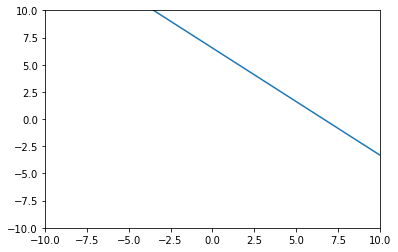

In [6]:
x1, y1, x2, y2 = random_number(), random_number(), random_number(), random_number()

line_points = [[x1, y1], [x2, y2]]
plot(line_points)

We choose $n = 20$ random points in the plane:

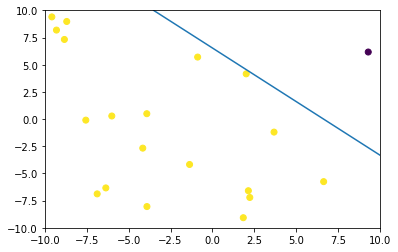

In [7]:
data_set = [[random_number(), random_number()] for _ in range(n)]

a = (y1 - y2)/(x1 - x2)
b = y1 - a*x1

# Calculate the weights
w1 = a
w2 = -1
b = b

# Give the right classification
classification = [1 if b + w1*x[0] + w2*x[1] >= 0 else -1 for x in data_set]

plot(line_points, data_set, classification)

We run the PLA algorithm in order to learn a linear classification:

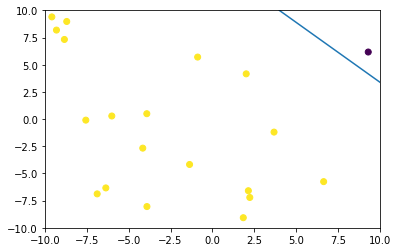

In [8]:
pla = Pla(data_set, classification)

b, w1, w2 = pla.w
x1, y1, x2, y2 = 0, -b/w2, -b/w1, 0
new_line_points = [[x1, y1], [x2, y2]]
plot(new_line_points, data_set, classification)

We see our fitted line is not the same as the original, but the result is the same.
This is the number of iterations:

In [9]:
print(pla.n_iterations)

23


**Reference**:
```bibtex
@book{yaser2012learning,
    title={Learning from Data: A Short Course},
    author={Yaser S. Abu-Mostafa and Magdon-Ismail, M. and Lin, H.T.},
    isbn={9781600490064},
    url={https://books.google.com.br/books?id=iZUzMwEACAAJ},
    year={2012},
    publisher={AMLBook.com}
}
```